In [1]:
import perceval as pcvl
import sympy as sp
import numpy as np

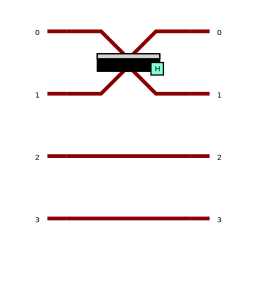

In [2]:
# Hadamard Gate
my_circuit2 = pcvl.Circuit(4)  # Creates circuit with 2 spatial modes
R = 0
my_circuit2.add((0,1), pcvl.BS.H())
my_circuit2.describe()
pcvl.pdisplay(my_circuit2)

In [3]:
p = pcvl.Processor("Naive", my_circuit2)
states = {
    pcvl.BasicState([1, 0, 1, 0]): "00",
    pcvl.BasicState([1, 0, 0, 1]): "01",
    pcvl.BasicState([0, 1, 1, 0]): "10",
    pcvl.BasicState([0, 1, 0, 1]): "11",
}

ca = pcvl.algorithm.Analyzer(p, states)
ca.compute(expected={"00": "00", "01": "01","10": "10", "11": "11"})
pcvl.pdisplay(ca)

,00,01,10,11
00,1/2,0,1/2,0
01,0,1/2,0,1/2
10,1/2,0,1/2,0
11,0,1/2,0,1/2


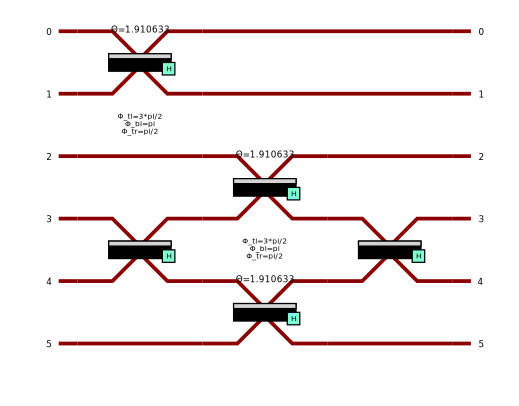

In [4]:
# CNOT Gate
cnot = pcvl.Circuit(6, name="Ralph CNOT")
cnot.add((0, 1), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((3, 4), pcvl.BS.H())
cnot.add((2, 3), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((4, 5), pcvl.BS.H(pcvl.BS.r_to_theta(1/3)))
cnot.add((3, 4), pcvl.BS.H())
pcvl.pdisplay(cnot)

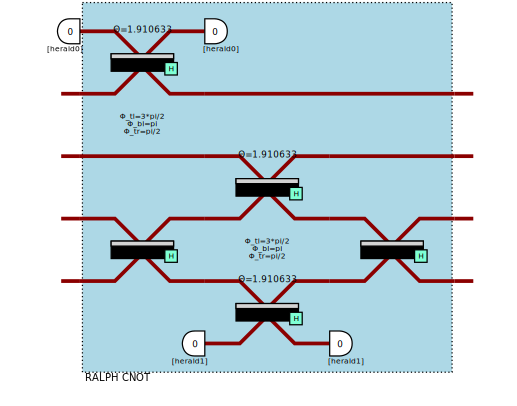

In [5]:
p = pcvl.Processor("Naive", cnot)
p.set_postprocess(lambda s: (s[1] or s[2]) and (s[3] or s[4]))
p.add_herald(0, 0)
p.add_herald(5, 0)

pcvl.pdisplay(p, recursive = True)

In [6]:
source = pcvl.Source()  #default is noiseless
source

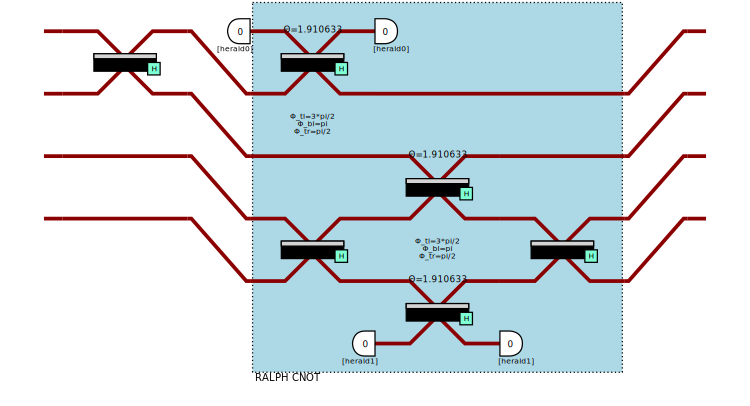

In [7]:
QPU = pcvl.Processor("Naive",4,source)
QPU.add(0,pcvl.BS.H())

QPU.add(0,p)

pcvl.pdisplay(QPU, recursive = True)

In [8]:
states = {
    pcvl.BasicState([1, 0, 1, 0]): "00",
    pcvl.BasicState([1, 0, 0, 1]): "01",
    pcvl.BasicState([0, 1, 1, 0]): "10",
    pcvl.BasicState([0, 1, 0, 1]): "11"
}

ca = pcvl.algorithm.Analyzer(QPU, states)
ca.compute(expected={"00": "00", "01": "01", "10": "11", "11": "10"})
pcvl.pdisplay(ca)

,00,01,10,11
00,1/2,0,0,1/2
01,0,1/2,1/2,0
10,1/2,0,0,1/2
11,0,1/2,1/2,0


In [9]:
# Gives the source distribution
QPU.with_input(pcvl.BasicState([1, 0, 1, 0]))
pcvl.pdisplay(QPU.source_distribution, precision=1e-4)

state,probability
"|1,0,1,0,0,0>",1


In [10]:
# Gives the output distribution
output_distribution=QPU.probs()["results"]
pcvl.pdisplay(output_distribution, max_v=10)

state,probability
"|0,1,0,1>",1/2
"|1,0,1,0>",1/2


In [11]:
#Making purity as 99%
source = pcvl.Source(multiphoton_component=0.01) 
QPU = pcvl.Processor("Naive",4,source)
QPU.add(0,pcvl.BS.H())

QPU.add(0,p)

pcvl.pdisplay(QPU, recursive = True)

states = {
    pcvl.BasicState([1, 0, 1, 0]): "00",
    pcvl.BasicState([1, 0, 0, 1]): "01",
    pcvl.BasicState([0, 1, 1, 0]): "10",
    pcvl.BasicState([0, 1, 0, 1]): "11"
}

ca = pcvl.algorithm.Analyzer(QPU, states)
ca.compute(expected={"00": "00", "01": "01", "10": "11", "11": "10"})
pcvl.pdisplay(ca)

,00,01,10,11
00,1/2,0,0,1/2
01,0,1/2,1/2,0
10,1/2,0,0,1/2
11,0,1/2,1/2,0


In [12]:
# Gives the source distribution
QPU.with_input(pcvl.BasicState([1, 0, 1, 0]))
pcvl.pdisplay(QPU.source_distribution, precision=1e-4)
#Here, the heralded modes are shown because if there were a photon on them, they would also have the imperfect source. 
#They are represented at the end of the state (the two last modes) as they have been added after the declaration of the processor.

state,probability
"|{_:0},0,{_:0},0,0,0>",0.9899
"|{_:0}{_:1},0,{_:0},0,0,0>",0.005
"|{_:0},0,{_:0}{_:1},0,0,0>",0.005
"|{_:0}{_:1},0,{_:0}{_:2},0,0,0>",0


In [13]:
# Gives the output distribution
output_distribution=QPU.probs()["results"]
pcvl.pdisplay(output_distribution, max_v=10)

state,probability
"|0,1,0,1>",0.491662
"|1,0,1,0>",0.491662
"|0,1,2,0>",0.002496
"|1,1,1,0>",0.002496
"|0,2,1,0>",0.002496
"|0,1,1,1>",0.002496
"|0,2,0,1>",0.00208
"|1,0,2,0>",0.00208
"|1,1,0,1>",0.000831937
"|1,0,1,1>",0.000831937


In [14]:
#Making purity 90%
source = pcvl.Source(multiphoton_component=0.1) 
QPU = pcvl.Processor("Naive",4,source)
QPU.add(0,pcvl.BS.H())

QPU.add(0,p)

pcvl.pdisplay(QPU, recursive = True)

states = {
    pcvl.BasicState([1, 0, 1, 0]): "00",
    pcvl.BasicState([1, 0, 0, 1]): "01",
    pcvl.BasicState([0, 1, 1, 0]): "10",
    pcvl.BasicState([0, 1, 0, 1]): "11"
}

ca = pcvl.algorithm.Analyzer(QPU, states)
ca.compute(expected={"00": "00", "01": "01", "10": "11", "11": "10"})
pcvl.pdisplay(ca)

,00,01,10,11
00,1/2,0,0,1/2
01,0,1/2,1/2,0
10,1/2,0,0,1/2
11,0,1/2,1/2,0


In [15]:
# Gives the source distribution
QPU.with_input(pcvl.BasicState([1, 0, 1, 0]))
pcvl.pdisplay(QPU.source_distribution, precision=1e-4)

state,probability
"|{_:0},0,{_:0},0,0,0>",0.8916
"|{_:0}{_:1},0,{_:0},0,0,0>",0.0526
"|{_:0},0,{_:0}{_:1},0,0,0>",0.0526
"|{_:0}{_:1},0,{_:0}{_:2},0,0,0>",0.0031


In [16]:
# Gives the output distribution
output_distribution=QPU.probs()["results"]
pcvl.pdisplay(output_distribution, max_v=10)

state,probability
"|0,1,0,1>",0.416058
"|1,0,1,0>",0.416058
"|0,1,2,0>",0.024555
"|1,1,1,0>",0.024555
"|0,1,1,1>",0.024555
"|0,2,1,0>",0.024555
"|0,2,0,1>",0.020462
"|1,0,2,0>",0.020462
"|1,1,0,1>",0.008185
"|1,0,1,1>",0.008185


In [17]:
#Making emission probability(brightness) as 40% with no multiphotons
source = pcvl.Source(emission_probability=0.40) 
QPU = pcvl.Processor("Naive",4,source)
QPU.add(0,pcvl.BS.H())

QPU.add(0,p)

pcvl.pdisplay(QPU, recursive = True)

states = {
    pcvl.BasicState([1, 0, 1, 0]): "00",
    pcvl.BasicState([1, 0, 0, 1]): "01",
    pcvl.BasicState([0, 1, 1, 0]): "10",
    pcvl.BasicState([0, 1, 0, 1]): "11"
}

ca = pcvl.algorithm.Analyzer(QPU, states)
ca.compute(expected={"00": "00", "01": "01", "10": "11", "11": "10"})
pcvl.pdisplay(ca)

,00,01,10,11
00,1/2,0,0,1/2
01,0,1/2,1/2,0
10,1/2,0,0,1/2
11,0,1/2,1/2,0


In [18]:
# Gives the source distribution
QPU.with_input(pcvl.BasicState([1, 0, 1, 0]))
pcvl.pdisplay(QPU.source_distribution, precision=1e-4)

state,probability
"|0,0,0,0,0,0>",9/25
"|0,0,1,0,0,0>",6/25
"|1,0,0,0,0,0>",6/25
"|1,0,1,0,0,0>",4/25


In [19]:
# Gives the output distribution
output_distribution=QPU.probs()["results"]
pcvl.pdisplay(output_distribution, max_v=10)

state,probability
"|0,1,0,1>",1/2
"|1,0,1,0>",1/2


In [20]:
#Making emission probability(brightness) as 100% with no multiphotons
source = pcvl.Source(emission_probability=0.40) 
QPU = pcvl.Processor("Naive",4,source)
QPU.add(0,pcvl.BS.H())

QPU.add(0,p)

pcvl.pdisplay(QPU, recursive = True)

states = {
    pcvl.BasicState([1, 0, 1, 0]): "00",
    pcvl.BasicState([1, 0, 0, 1]): "01",
    pcvl.BasicState([0, 1, 1, 0]): "10",
    pcvl.BasicState([0, 1, 0, 1]): "11"
}

ca = pcvl.algorithm.Analyzer(QPU, states)
ca.compute(expected={"00": "00", "01": "01", "10": "11", "11": "10"})
pcvl.pdisplay(ca)

,00,01,10,11
00,1/2,0,0,1/2
01,0,1/2,1/2,0
10,1/2,0,0,1/2
11,0,1/2,1/2,0


In [21]:
# Gives the source distribution
QPU.with_input(pcvl.BasicState([1, 0, 1, 0]))
pcvl.pdisplay(QPU.source_distribution, precision=1e-4)

state,probability
"|0,0,0,0,0,0>",9/25
"|0,0,1,0,0,0>",6/25
"|1,0,0,0,0,0>",6/25
"|1,0,1,0,0,0>",4/25


In [22]:
# Gives the output distribution
output_distribution=QPU.probs()["results"]
pcvl.pdisplay(output_distribution, max_v=10)

state,probability
"|0,1,0,1>",1/2
"|1,0,1,0>",1/2


In [23]:
#Making emission probability(brightness) as 10% with no multiphotons
source = pcvl.Source(emission_probability=0.10) 
QPU = pcvl.Processor("Naive",4,source)
QPU.add(0,pcvl.BS.H())

QPU.add(0,p)

pcvl.pdisplay(QPU, recursive = True)

states = {
    pcvl.BasicState([1, 0, 1, 0]): "00",
    pcvl.BasicState([1, 0, 0, 1]): "01",
    pcvl.BasicState([0, 1, 1, 0]): "10",
    pcvl.BasicState([0, 1, 0, 1]): "11"
}

ca = pcvl.algorithm.Analyzer(QPU, states)
ca.compute(expected={"00": "00", "01": "01", "10": "11", "11": "10"})
pcvl.pdisplay(ca)

,00,01,10,11
00,1/2,0,0,1/2
01,0,1/2,1/2,0
10,1/2,0,0,1/2
11,0,1/2,1/2,0


In [24]:
# Gives the source distribution
QPU.with_input(pcvl.BasicState([1, 0, 1, 0]))
pcvl.pdisplay(QPU.source_distribution, precision=1e-4)

state,probability
"|0,0,0,0,0,0>",0.81
"|0,0,1,0,0,0>",0.09
"|1,0,0,0,0,0>",0.09
"|1,0,1,0,0,0>",0.01


In [25]:
# Gives the output distribution
output_distribution=QPU.probs()["results"]
pcvl.pdisplay(output_distribution, max_v=10)

state,probability
"|0,1,0,1>",1/2
"|1,0,1,0>",1/2
